# Introduction

This notebook is designed to be the "exercise" notebook for you to practice defining hierarchical models. We will do this with the finches dataset again.

In [11]:
import pandas as pd
import pymc3 as pm
from data import load_finches_2012

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
df = load_finches_2012()
df.groupby('species').size()

species
fortis      121
scandens    127
unknown       1
dtype: int64

In [13]:
df.sample(5)

,band,species,beak_length,beak_depth,species_enc
6,19072,fortis,9.6,7.8,0
111,21287,fortis,10.4,8.4,0
3,19041,fortis,10.3,9.6,0
133,19251,scandens,13.4,9.5,1
56,19774,fortis,12.5,9.7,0


In [14]:
df.groupby('species')['beak_depth'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
fortis,121.0,8.605372,0.732570,7.2,8.1,8.5,9.0,11.1
scandens,127.0,9.186220,0.669241,7.7,8.8,9.2,9.6,11.0
unknown,1.0,6.800000,NaN,6.8,6.8,6.8,6.8,6.8


In [15]:
fortis_filter = df['species'] == 'fortis'
scandens_filter = df['species'] == 'scandens'
unknown_filter = df['species'] == 'unknown'

**Exercise:** Define a hierarchical model for the finches beak depths. For bonus points, use NumPy-like fancy indexing!

In [16]:
with pm.Model() as beak_depth_model:
    # SD can only be positive, therefore it is reasonable to constrain to >0
    # Likewise for betas.
    sd_hyper = pm.HalfCauchy('sd_hyper', beta=100)
    beta_hyper = pm.HalfCauchy('beta_hyper', beta=100)
    
    # Beaks cannot be of "negative" mean, therefore, HalfNormal is 
    # a reasonable, constrained prior.
    mean = pm.HalfNormal('mean', sd=sd_hyper, shape=(3,))
    sd = pm.HalfCauchy('sd', beta=beta_hyper, shape=(3,))
    nu = pm.Exponential('nu', lam=1/29.) + 1
    
    # Define the likelihood distribution for the data.
    like = pm.StudentT('likelihood', 
                       nu=nu,
                       mu=mean[df['species_enc']], 
                       sd=sd[df['species_enc']], 
                       observed=df['beak_depth'])

Sample from the posterior distribution!

In [17]:
with beak_depth_model:
    trace = pm.sample(2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu_log__, sd_log__, mean_log__, beta_hyper_log__, sd_hyper_log__]
100%|██████████| 2500/2500 [01:19<00:00, 31.56it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c3800f0>,
      dtype=object)

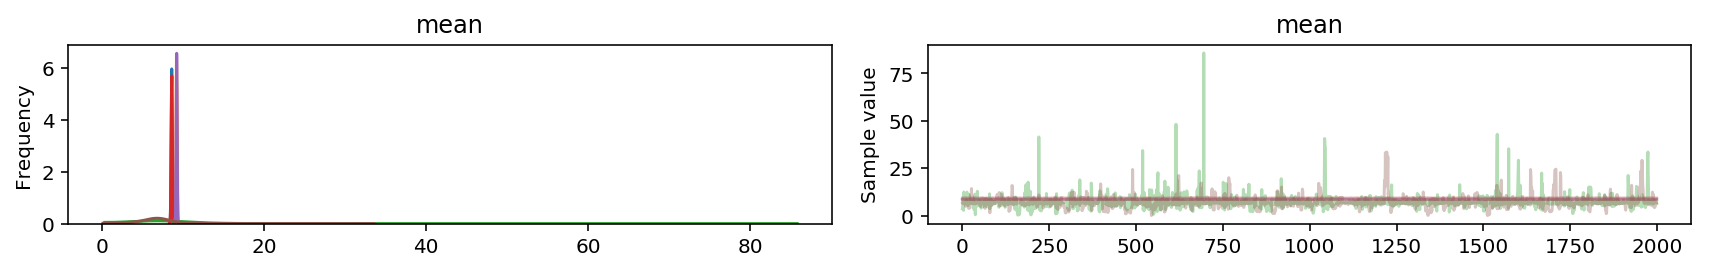

In [18]:
pm.traceplot(trace, varnames=['mean'])

Text(0.5,1,'unknown')

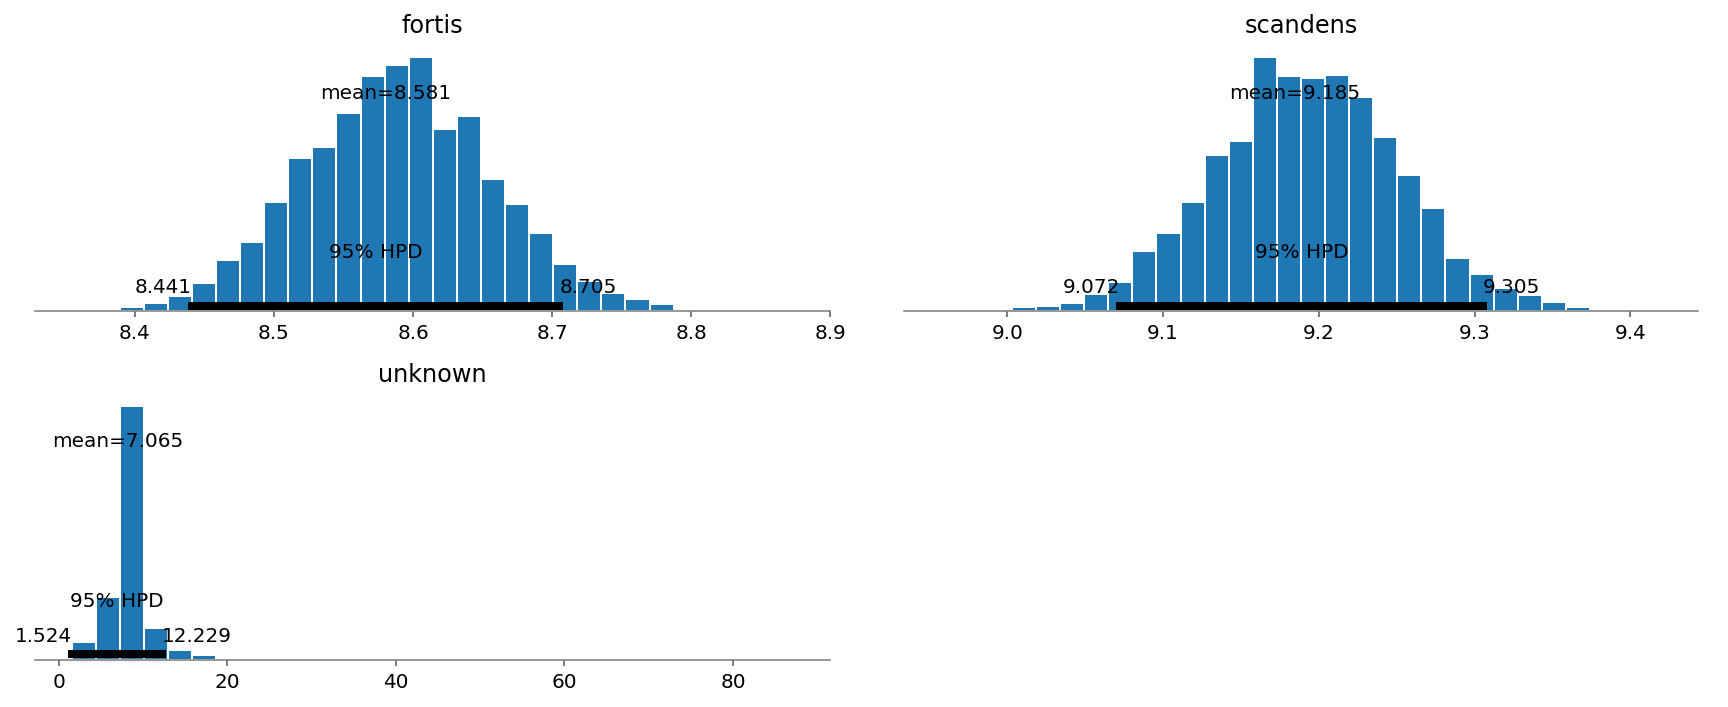

In [19]:
ax1, ax2, ax3 = pm.plot_posterior(trace, varnames=['mean'])
ax1.set_title('fortis')
ax2.set_title('scandens')
ax3.set_title('unknown')

Now, repeat the model specification for beak length.

In [20]:
with pm.Model() as beak_length_model:
    # SD can only be positive, therefore it is reasonable to constrain to >0
    # Likewise for betas.
    sd_hyper = pm.HalfCauchy('sd_hyper', beta=100)
    beta_hyper = pm.HalfCauchy('beta_hyper', beta=100)
    
    # Beaks cannot be of "negative" mean, therefore, HalfNormal is 
    # a reasonable, constrained prior.
    mean = pm.HalfNormal('mean', sd=sd_hyper, shape=(3,))
    sd = pm.HalfCauchy('sd', beta=beta_hyper, shape=(3,))
    nu = pm.Exponential('nu', lam=1/29.) + 1
    
    # Define the likelihood distribution for the data.
    like = pm.StudentT('likelihood', 
                       nu=nu,
                       mu=mean[df['species_enc']], 
                       sd=sd[df['species_enc']], 
                       observed=df['beak_length'])

In [21]:
with beak_length_model:
    trace = pm.sample(2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu_log__, sd_log__, mean_log__, beta_hyper_log__, sd_hyper_log__]
100%|██████████| 2500/2500 [02:12<00:00, 18.80it/s]
The number of effective samples is smaller than 25% for some parameters.


Text(0.5,1,'unknown')

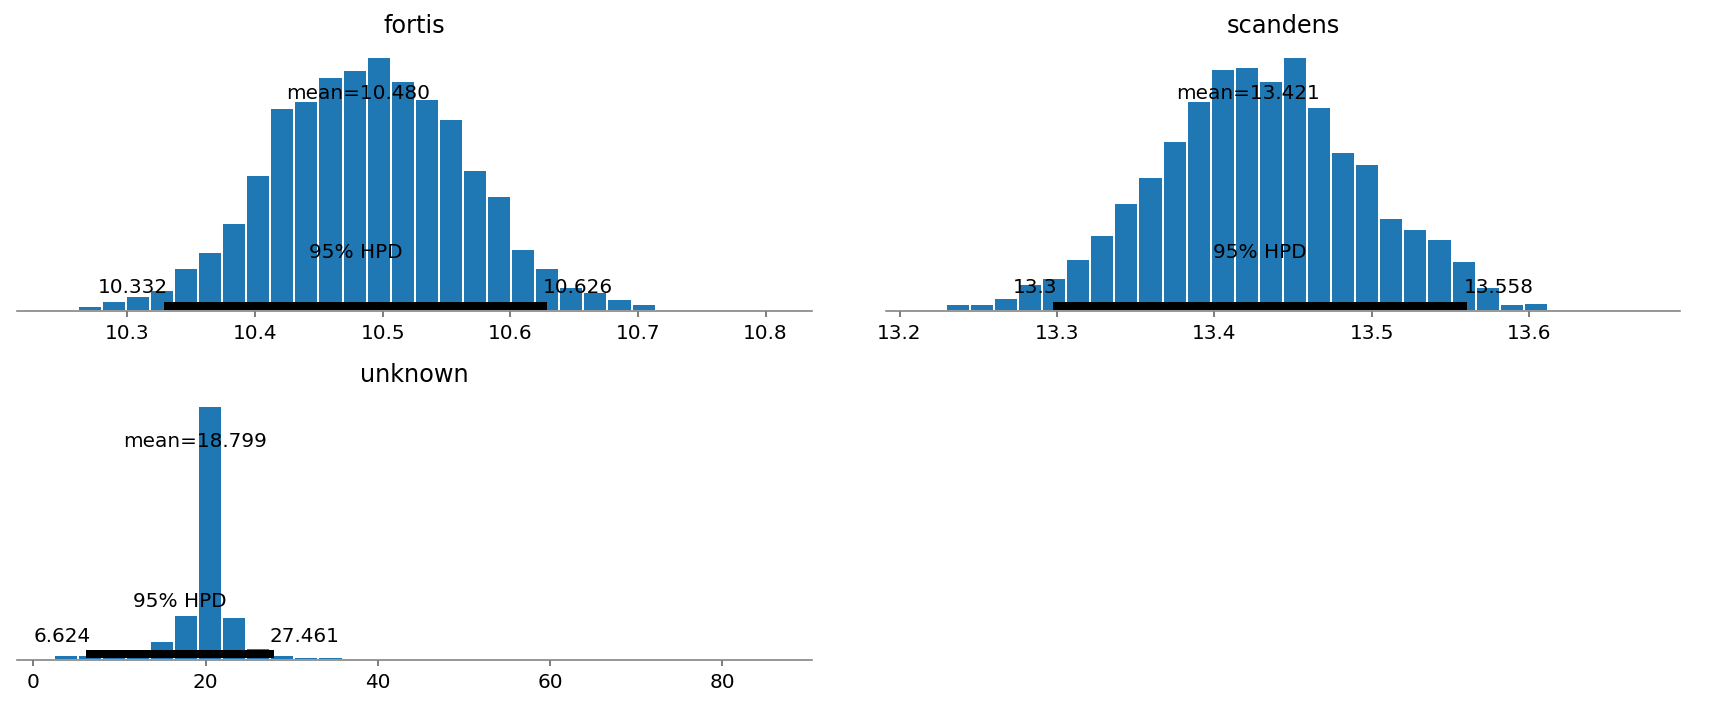

In [22]:
ax1, ax2, ax3 = pm.plot_posterior(trace, varnames=['mean'])
ax1.set_title('fortis')
ax2.set_title('scandens')
ax3.set_title('unknown')

## Discuss

- Are the estimates for the unknown species' beak depth and beak length more reasonable? 